# Optimization softwares (CVXPY and Gurobi)

This notebook is created to faciliate the coding tutorial sessions of the Jumpstart Summer Program 2023 @ Data Sciences and Operations Department, USC Marshall. 
If you have any questions, please contact luyang.zhang@marshall.usc.edu.

* [Section 1: Introduction to optimization softwares.](#section1)
    * [Why using Python?](#section1_1)
    * [CVXPY](#section1_1)
    * [Gurobi](#section1_2)
* [Section 2: Some real-world decision making problems to solve](#section2)
    * [Knapsack problem](#section2_1)
    * [Portfolio problem](#section2_1)

# Section 1: Introduction to optimization softwares. <a class="anchor" id="section1"></a>

Previously, Mohammad (mehrabim@usc.edu) covered CVX softwarees in Matlab. Today, we will have a more general introduction about some popular optimization softwares in Python.

### Section 1.1:  Why using Python?<a class="anchor" id="section1_1"></a>

Python is currently one of the most popular programming laguange in the world and might be the most popular and easily accessing for data scientiest (potentially one of your career choices!). Previously, tutorials covering regressions and data processing also used Python. Let's consider the case where some data has been collected and analysed, now it is our job to further optimize those for some important decision making. Thus, it could be important to keep consistant on the programming language that we choose to use previously. 

### Section 1.2: CVXPY.<a class="anchor" id="section1_2"></a>

CVXPY is probably one of the most widly used optimization solving pakages. 

CVXPY is an open source Python-embedded modeling language for convex optimization problems. It lets you express your problem in a natural way that follows the math, rather than in the restrictive standard form required by solvers.
https://www.cvxpy.org/

CVXPY is NOT a solver but a optimization programming language! In another word, CVXPY is more like a platform/interface that you can use other solvers to solve some optimization problems.

#### Installation

In [ ]:
!pip install cvxpy

# check: https://www.cvxpy.org/install/index.html

#### Example 1: Linear programming

Suppose we try with the a simple linear optimization problem:
$$
\begin{align}
    \min_{x} &\; A x - b 
    \\
    \text{s.t } &0 \leq x \leq 1,
\end{align}
$$
where $A$ is a matrix and $b$ is a vector.

In [5]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


#### Example 2: Quadratic programming (non-linear case)

$$
\begin{align}
    \min_{x} &\;  x^T P x - q^T x 
    \\
    \text{s.t } &G x \leq h
    \\
    & A x \leq b,
\end{align}
$$
where $P,G,A$ are matrices and $q,h,b$ are vectors.

In [6]:
# Generate a random non-trivial quadratic program.
m = 15
n = 10
p = 5
np.random.seed(1)
P = np.random.randn(n, n)
P = P.T @ P
q = np.random.randn(n)
G = np.random.randn(m, n)
h = G @ np.random.randn(n)
A = np.random.randn(p, n)
b = np.random.randn(p)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h,
                  A @ x == b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 86.89141585569917
A solution x is
[-1.68244521  0.29769913 -2.38772183 -2.79986015  1.18270433 -0.20911897
 -4.50993526  3.76683701 -0.45770675 -3.78589638]
A dual solution corresponding to the inequality constraints is
[ 0.          0.          0.          0.          0.         10.45538054
  0.          0.          0.         39.67365045  0.          0.
  0.         20.79927156  6.54115873]


#### Why using CVXPY?

1. CVXPY is user-friendly. Defining the varaibles and constructing constrains are straightforward. 

2. It is solver-friendly, meaning that it can almost work with all different solvers. Here is a list of avaliable solvers in below: 
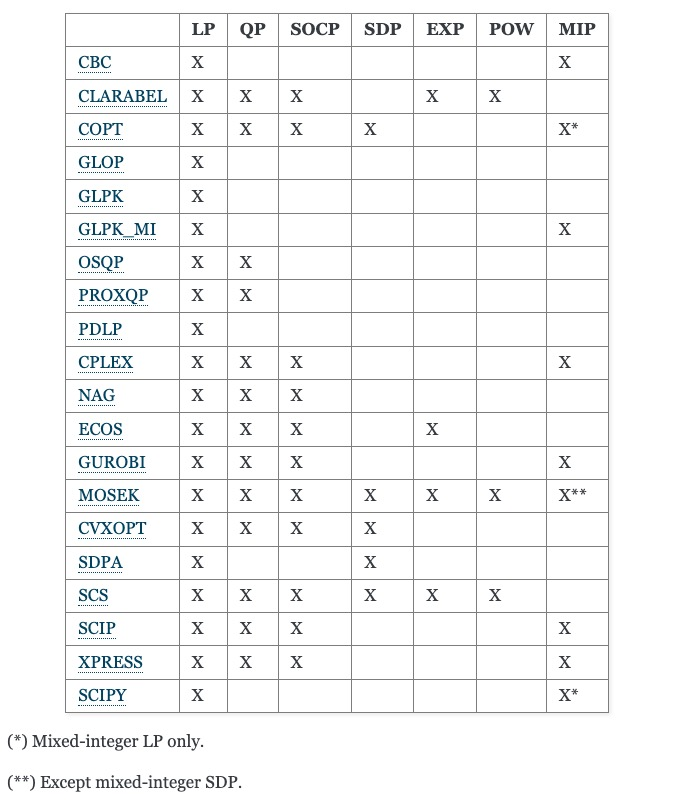
https://www.cvxpy.org/examples/index.html

3. It works very well with numpy, one of the most important data structure in Python. Thus, it largely reduces the time to code. For instance, we can easily code the multiplication between matrix $A$ and vector $x$ as <code> A @ x </code> as a privilege of numpy. 

### Section 1.3: Gurobi.<a class="anchor" id="section1_3"></a>

Gurobi Optimizer is a prescriptive analytics platform and a decision-making technology developed by Gurobi Optimization, LLC. The Gurobi Optimizer (often referred to as simply, “Gurobi”) is a solver, since it uses mathematical optimization to calculate the answer to a problem.
https://en.wikipedia.org/wiki/Gurobi_Optimizer

Gurobi is one of the widely used solvers in the world with many specifications and extension. It is probably one of the fastest solvers. In short words, when we dig more into the world of optimization with complex or large-scale problem, then in order to solve faster and more accuretely, we might need solvers like Gurobi.

The reason why we introduce Gurobi over other solvers listed in the above table is, Gurobi has very exclusive documentation, support and extensions. It might be the most successful commercial solvers so far. 

#### Installation

The installation of Gurobi is a more complex step, we might need to first download from this page:
https://www.gurobi.com/documentation/quickstart.html
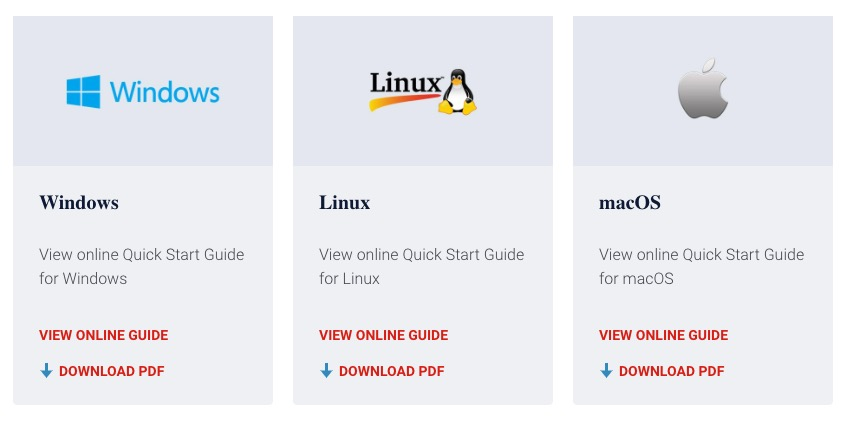

Then according to your each individual operating system, choose the according link. Then, we need to obtain the license. The good news is, the license is free for acedemic usage, which means that using our school email and network, we are able to get a free acount.

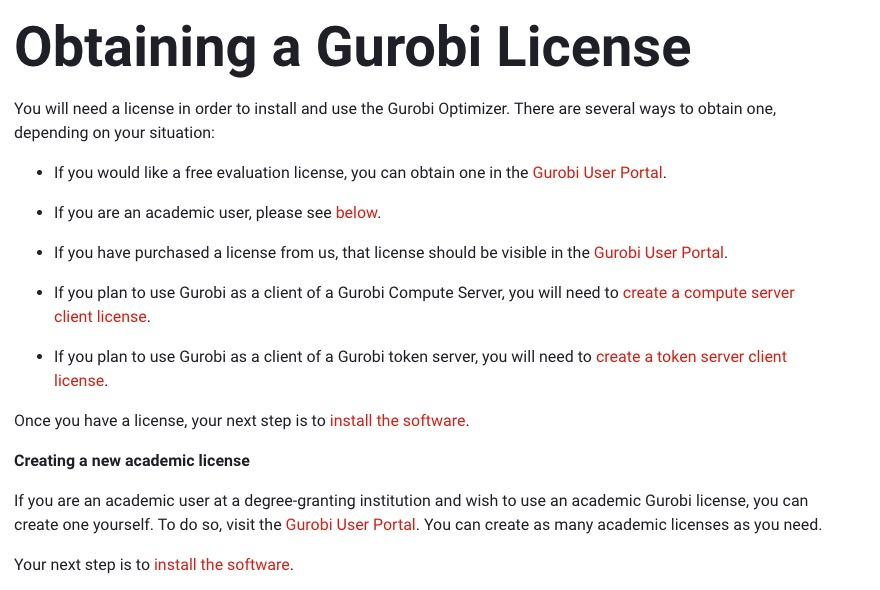
https://www.gurobi.com/documentation/10.0/quickstart_mac/obtaining_a_grb_license.html

Following the instructions listed above. Once you have a license, your next step is to install the software.

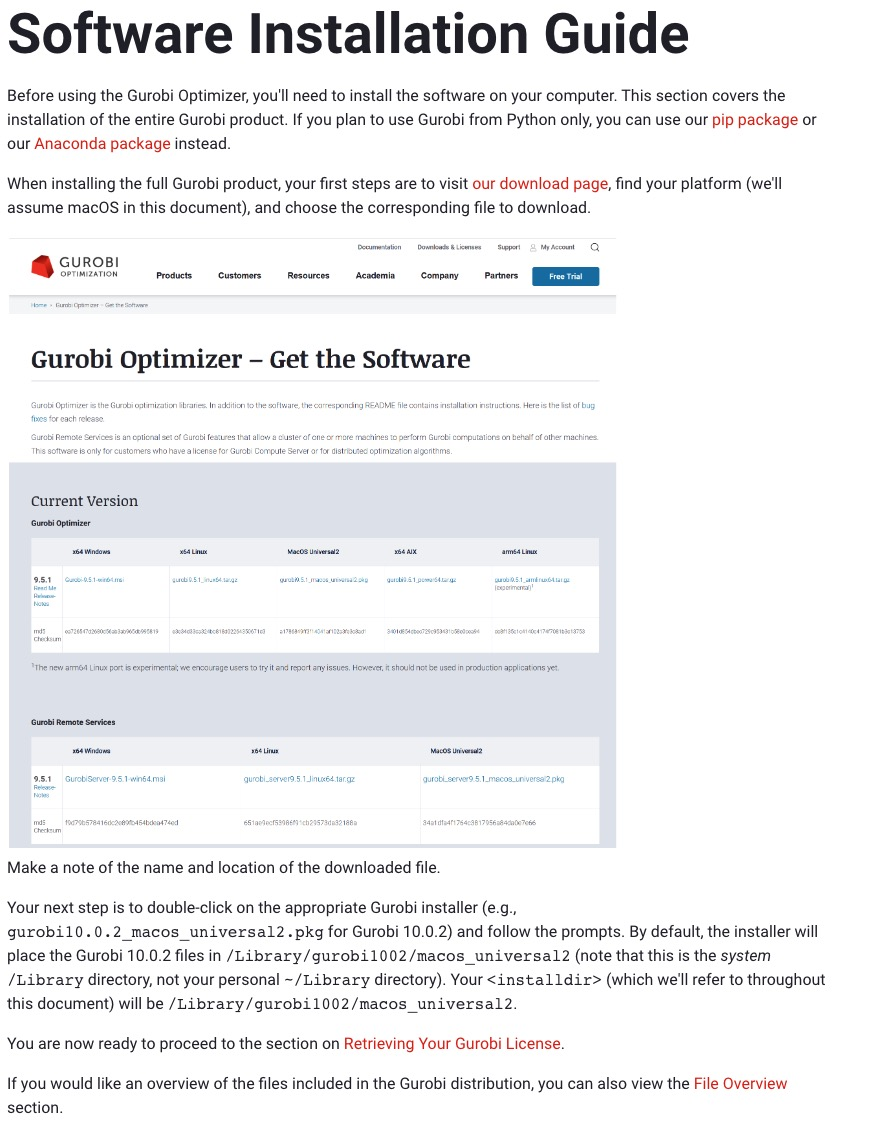

#### Example 1: Mixed Integer programming
Suppose we try with the a simple  Mixed Integer programming problem:
$$
\begin{align}
    \min_{x,y,z} &\; x +   y + 2 z
    \\
    \text{s.t } &x + 2 y + 3 z <= 4
    \\
    &x +   y       >= 1
    \\
    & x,y,z \in \{0,1\}
\end{align}
$$

In [15]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import scipy.sparse as sp

try:

    # Create a new model
    m = gp.Model("matrix1")

    # Create variables, where x is a vector
    x = m.addMVar(shape=3, vtype=GRB.BINARY, name="x")

    # Set objective
    obj = np.array([1.0, 1.0, 2.0])
    m.setObjective(obj @ x, GRB.MAXIMIZE)

    # Build (sparse) constraint matrix
    val = np.array([1.0, 2.0, 3.0, -1.0, -1.0])
    row = np.array([0, 0, 0, 1, 1])
    col = np.array([0, 1, 2, 0, 1])

    A = sp.csr_matrix((val, (row, col)), shape=(2, 3))

    # Build rhs vector
    rhs = np.array([4.0, -1.0])

    # Add constraints
    m.addConstr(A @ x <= rhs, name="c")

    # Optimize model
    m.optimize()

    print(x.X)
    print('Obj: %g' % m.ObjVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ": " + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x8d4960d3
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
[1. 0. 1.]
Obj: 3


#### Example 2: Quadratic programming

Suppose we have the a simple  Mixed Integer programming problem:
$$
\begin{align}
    \min_{x,y,z} &\; x^2 + x*y + y^2 + y*z + z^2 + 2 x
    \\
    \text{s.t } &x + 2 y + 3 z >= 4
    \\
    &x +   y       >= 1
    \\
    & x,y,z \geq 0.
\end{align}
$$

In [14]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
m = gp.Model("qp")

# Create variables
x = m.addVar(ub=1.0, name="x")
y = m.addVar(ub=1.0, name="y")
z = m.addVar(ub=1.0, name="z")

# Set objective: x^2 + x*y + y^2 + y*z + z^2 + 2 x
obj = x**2 + x*y + y**2 + y*z + z**2 + 2*x
m.setObjective(obj)

# Add constraint: x + 2 y + 3 z >= 4
m.addConstr(x + 2 * y + 3 * z >= 4, "c0")

# Add constraint: x + y >= 1
m.addConstr(x + y >= 1, "c1")

m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % obj.getValue())

x.VType = GRB.INTEGER
y.VType = GRB.INTEGER
z.VType = GRB.INTEGER

m.optimize()

for v in m.getVars():
    print('%s %g' % (v.VarName, v.X))

print('Obj: %g' % obj.getValue())

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0xc501370b
Model has 5 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [2e+00, 2e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Presolve time: 0.02s
Presolved: 2 rows, 3 columns, 5 nonzeros
Presolved model has 5 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 2
 AA' NZ     : 6.000e+00
 Factor NZ  : 1.000e+01
 Factor Ops : 3.000e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.69015022e+05 -1.71012100e+05  1.50e+03 3.33e+02  1.00e+06     0s
   1   3.60255402e+04 -3.91306233e+04  2.28e+02 3.82e+0

# Section 2: Some real-world decision making problems to solve. <a class="anchor" id="section2"></a>

### Section 2.1: Knapsack problem.<a class="anchor" id="section2_1"></a>

Knapsack problem is one of the most classical problem in the field of optimization: 

Given a set of items, each with a weight and a value, determine which items to include in the collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.

The most common problem being solved is the 0-1 knapsack problem, which restricts the number $x_{i}$ of copies of each kind of item to zero or one. Given a set of $n$ items numbered from $1$ up to $n$, each with a weight $w_{i}$ and a value $v_{i}$, along with a maximum weight capacity $W$,
$$
\begin{align}
    \min_{x_i} &\; \sum_{i} v_i x_i
    \\
    \text{s.t } &\sum_{i} w_i x_i \leq W 
    \\
    & x_i \in \{0,1\}.
\end{align}
$$

In [26]:
# define data coefficients
n = 9
v = np.array([6, 6, 8, 9, 6, 7, 3, 2, 6])
w = np.array([2, 3, 6, 7, 5, 9, 4, 8, 5])
W = 20

# create empty model
m = gp.Model()

# add decision variables
x = m.addMVar(n, vtype=GRB.BINARY, name='x')

# set objective function
m.setObjective(v@x, GRB.MAXIMIZE)

# add constraint
m.addConstr(w@x <= W, name="knapsack")

m.optimize()

print(x.X)

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 9 columns and 9 nonzeros
Model fingerprint: 0x2ac36f8f
Variable types: 0 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [2e+00, 9e+00]
  Objective range  [2e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 29.0000000
Presolve removed 1 rows and 9 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 29 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.900000000000e+01, best bound 2.900000000000e+01, gap 0.0000%
[1. 1. 1. 1. 0. 0. 0. 0. 0.]


### Section 2.2: Portfolio selection problem.<a class="anchor" id="section2_2"></a>

Portfolio selection: given a sum of money to invest, one must decide how to spend it amongst a portfolio of financial securities.  Our approach is due to Markowitz (1959) and looks to minimize the risk associated with the
investment while realizing a target expected return.  By varying the target, one can compute an 'efficient frontier', which defines the optimal portfolio for a given expected return.

We first download some data from Yahoo finance

In [ ]:
!pip install yfinance

In [10]:
import pandas as pd
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2023-1-1', '2023-5-1')['Adj Close']

data.to_csv('portfolio.csv')
# Print first 5 rows of the data
print(data.tail())

[*********************100%***********************]  6 of 6 completed
                  AAPL         AXP          BA         IBM         MU  \
Date                                                                    
2023-04-24  165.101639  160.041183  205.770004  123.713097  59.398232   
2023-04-25  163.543793  155.586472  202.190002  124.196503  58.030804   
2023-04-26  163.533798  155.187836  203.029999  124.157043  60.905396   
2023-04-27  168.177383  157.908508  206.039993  125.261978  61.783745   
2023-04-28  169.445618  160.788635  206.779999  124.709511  64.239120   

                   WMT  
Date                    
2023-04-24  152.181900  
2023-04-25  150.996414  
2023-04-26  150.338913  
2023-04-27  150.807129  
2023-04-28  150.398682  


Minimum Risk Portfolio:

	C0	: 0.0961834
	C1	: 0.0430425
	C2	: 2.74374e-13
	C3	: 0.361476
	C4	: 0.435264
	C5	: 0.0640338

Volatility      = 2.30701
Expected Return = 103.502
Plotted efficient frontier to 'portfolio.png'


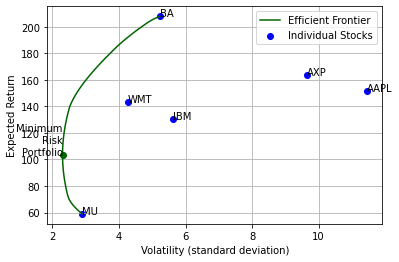

In [11]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Import (normalized) historical return data using pandas
data = pd.read_csv('portfolio.csv', index_col=0)
stocks = data.columns

# Calculate basic summary statistics for individual stocks
stock_volatility = data.std()
stock_return = data.mean()

# Create an empty model
m = gp.Model('portfolio')

# Add a variable for each stock
vars = pd.Series(m.addVars(stocks), index=stocks)

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks.
sigma = data.cov()
portfolio_risk = sigma.dot(vars).dot(vars)
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(vars.sum() == 1, 'budget')

# Optimize model to find the minimum risk portfolio
m.setParam('OutputFlag', 0)
m.optimize()

# Create an expression representing the expected return for the portfolio
portfolio_return = stock_return.dot(vars)

# Display minimum risk portfolio
print('Minimum Risk Portfolio:\n')
for v in vars:
    if v.X > 0:
        print('\t%s\t: %g' % (v.VarName, v.X))
minrisk_volatility = sqrt(portfolio_risk.getValue())
print('\nVolatility      = %g' % minrisk_volatility)
minrisk_return = portfolio_return.getValue()
print('Expected Return = %g' % minrisk_return)

# Add (redundant) target return constraint
target = m.addConstr(portfolio_return == minrisk_return, 'target')

# Solve for efficient frontier by varying target return
frontier = pd.Series(dtype=np.float64)
for r in np.linspace(stock_return.min(), stock_return.max(), 100):
    target.rhs = r
    m.optimize()
    frontier.loc[sqrt(portfolio_risk.getValue())] = r

# Plot volatility versus expected return for individual stocks
ax = plt.gca()
ax.scatter(x=stock_volatility, y=stock_return,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (stock_volatility[i], stock_return[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
frontier.plot(color='DarkGreen', label='Efficient Frontier', ax=ax)

# Format and display the final plot
#ax.axis([0.005, 0.06, -0.02, 0.025])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.savefig('portfolio.png')
print("Plotted efficient frontier to 'portfolio.png'")